<a href="https://colab.research.google.com/github/Niloofar-SecML/Security_Experiment/blob/main/MLPregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
housing = fetch_california_housing()
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target) #split data to train and test
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full) #split train data to train data and validate (we can consider % for split)

In [10]:
scaler = StandardScaler() #standardize data
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [12]:
model = keras.models.Sequential([
    keras.layers.Input(shape=x_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])


In [13]:
model.compile(loss="mean_squared_error", optimizer="sgd") #compile with MSE

In [15]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.2634 - val_loss: 9.9409
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2332 - val_loss: 0.4378
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4214 - val_loss: 0.4089
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4079 - val_loss: 0.4945
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3882 - val_loss: 0.4376
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3702 - val_loss: 0.3769
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3704 - val_loss: 0.3761
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3650 - val_loss: 0.3798
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3589 - val_loss: 0.3716
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3523 - val_loss: 0.3683
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3567 - val_loss: 0.3612
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

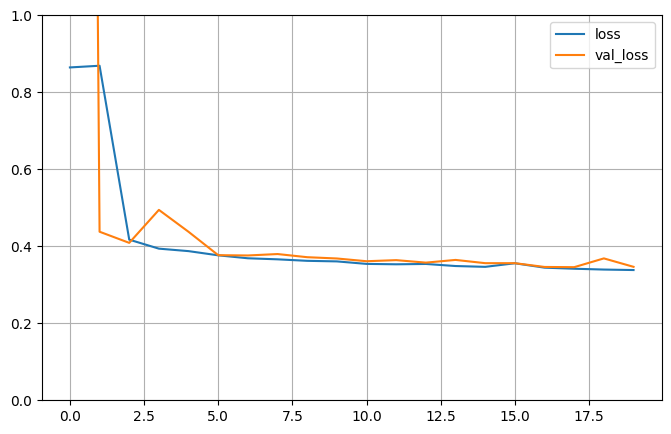

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [17]:
se_test = model.evaluate(x_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3564
